<h1>Figure 5</h1>
<p>This notebook analyses data generated with the luciferase reporter data described in the main manuscript.</p>
<p>Data are prepared by calculating F/R ratios, normalising against control condition, then re-normalising against control RLuc plasmid. ANOVAs are then conducted for the two series of data to establish statistical significance.</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%run _Scripts/lucs.py
%run _Scripts/balance_anova.py

<h1>Factor Deletions</h1>

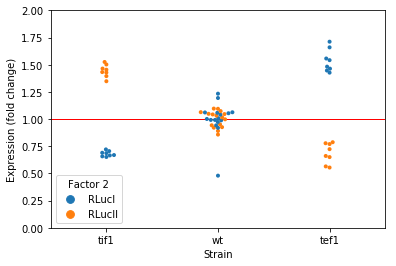

In [2]:
luc_data = prep_luc('_Data/An_160317_tif1.csv','_Data/An_160317_tef1.csv',controls=['wt','RLucC'])
t=sns.swarmplot(x='Factor 1', y='norm2', data = luc_data, hue = 'Factor 2', order=['tif1','wt','tef1',],size=4)
t.set(ylim=(0,2),xlabel='Strain',ylabel='Expression (fold change)')
plt.plot([-0.5,6.5],[1,1],color='red', linestyle='-', linewidth=1)
#plt.savefig('Deletions.svg')
plt.show()

In [3]:
#conduct statistical tests. "True" indicates that the null hypothesis (deletion is not different from wt) 
#was rejected at the given significance level
balance_anova(luc_data, control='wt')

  FlucI  0.05  0.01  0.001
0  tef1  True  True   True
1  tif1  True  True   True
  FlucII  0.05  0.01  0.001
0   tef1  True  True   True
1   tif1  True  True   True


# Cycloheximide

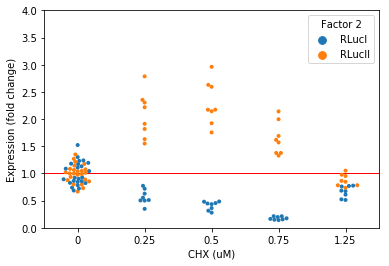

In [4]:
luc_data = prep_luc('_Data/An_161217_CHX_1.csv','_Data/An_171123_CHX_2.csv','_Data/An_180106_CHX_3.csv',controls=['0','RLucC'])
t=sns.swarmplot(x='Factor 1', y='norm2', data = luc_data, hue = 'Factor 2', order=['0','0.25','0.5','0.75','1.25'],size=4)
t.set(ylim=(0,4),xlabel='CHX (uM)',ylabel='Expression (fold change)')
plt.plot([-0.5,6.5],[1,1],color='red', linestyle='-', linewidth=1)
#plt.savefig('Cycloheximide.svg')
plt.show()

In [5]:
#conduct statistical tests. "True" indicates that the null hypothesis (deletion is not different from 0 conc) 
#was rejected at the given significance level
balance_anova(luc_data, control='0')

  FlucI  0.05  0.01  0.001
0  0.25  True  True   True
1   0.5  True  True   True
2  0.75  True  True   True
3  1.25  True  True   True
  FlucII   0.05   0.01  0.001
0   0.25   True   True   True
1    0.5   True   True   True
2   0.75   True   True   True
3   1.25  False  False  False
